In [4]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('./resampled_pull.csv')
data_train.head()#展示头部数据

,cali1,cali2
0,-0.720059,-0.0300
1,-0.716143,-0.0301
2,-0.683468,-0.0302
3,-0.783461,-0.0303
4,-0.732841,-0.0304


In [5]:
X_train =  data_train.loc[:,'cali1']
y_train =  data_train.loc[:,'cali2']

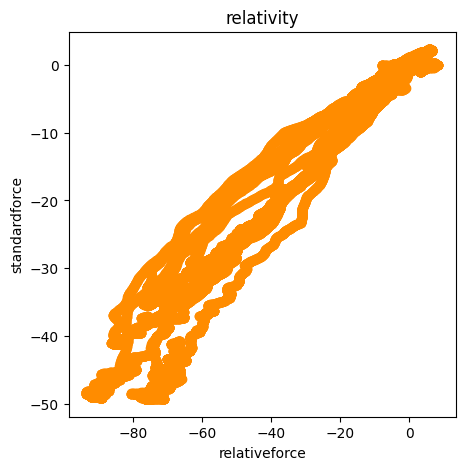

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train,c='darkorange')
plt.title('relativity')
plt.xlabel('relativeforce')
plt.ylabel('standardforce')
plt.show()
X_train = np.array(X_train).reshape(-1,1)

In [5]:
from sklearn.linear_model import  LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [6]:
data_test = pd.read_csv('./resampled_pull.csv')
X_test = data_test.loc[:,'cali1']
y_test = data_test.loc[:,'cali2']
X_test = np.array(X_test).reshape(-1 ,1)
print(X_test.shape)

(61901, 1)


In [7]:
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_absolute_error
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
e1 = mean_absolute_error(y_train,y_train_predict)
e2 = mean_absolute_error(y_test,y_test_predict)
print('training r2:',r2_train)
print('test r2:',r2_test)
print(e1)
print(e2)
print(lr1.coef_)
print(lr1.intercept_)

training r2: 0.9312099913674694
test r2: 0.24979200595045747
2.614490526845336
10.72029852115734
[0.23689099]
3.1152280744014362


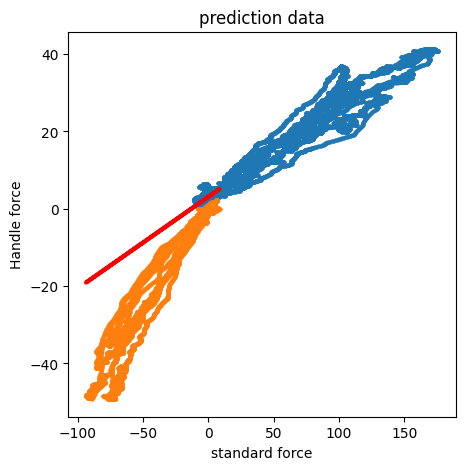

In [8]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_test,y_test_predict,linewidth = '3', label = "test", color='red')
plt.scatter(X_train,y_train,s=3)
plt.scatter(X_test, y_test,s=3)

plt.title('prediction data')
plt.xlabel('standard force')
plt.ylabel('Handle force')
plt.show()